In [ ]:
CONFIG = {
  'mode': 'Binary',
  'model': 'resnet50',
  'epochs': 10,
  'batch_size': 32,
  'seed': 777,
  'save_dir': 'results/finetune_last_layer',
  'weights': 'results/finetune_last_layer/best_model_v1.pt',
}

In [ ]:
from Models import ResNet50, ResNet101, ResNet50_MCDropout
from CustomDataset import CustomImageDataset
from utils.Plots import plot_confusion, plot_roc, reliability_diagram, expected_calibration_error, brier_score, entropy_hist


In [ ]:
# Quick dataset sanity check (uses CustomDataset defaults)
try:
    ds_train = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='train')
    ds_val   = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='val')
    ds_test  = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='test')
    print('Train:', len(ds_train), 'Val:', len(ds_val), 'Test:', len(ds_test))
except Exception as e:
    print('Dataset check skipped:', e)

Mounted at <PATH>


Processing .<PATH>
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4<PATH> MB 3.7 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8<PATH> MB 124.9 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6<PATH> MB 96.3 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7<PATH> kB 56.8 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8<PATH> MB 1.7 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5<PATH> MB 11.5 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3<PATH> MB 43.3 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9<PATH> MB 20.4 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5<PATH> MB 4.2 MB<PATH> eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1<PATH> MB 98.1 MB<PATH> eta 0:00:00
  

cuda


Label distribution in train_dataset: Counter({np.int64(0): 687, np.int64(1): 673})
{np.int64(0): np.int64(687), np.int64(1): np.int64(673)}


ResNet50(
  (relu): ReLU()
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResBottleNeck(
      (relu): ReLU()
      (inner_conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (inner_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip_connection): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2

conv1.weight: False
conv1.bias: False
bn1.weight: False
bn1.bias: False
conv2_x.0.inner_conv1.weight: False
conv2_x.0.inner_conv1.bias: False
conv2_x.0.inner_bn1.weight: False
conv2_x.0.inner_bn1.bias: False
conv2_x.0.inner_conv2.weight: False
conv2_x.0.inner_conv2.bias: False
conv2_x.0.inner_bn2.weight: False
conv2_x.0.inner_bn2.bias: False
conv2_x.0.inner_conv3.weight: False
conv2_x.0.inner_conv3.bias: False
conv2_x.0.inner_bn3.weight: False
conv2_x.0.inner_bn3.bias: False
conv2_x.0.skip_connection.0.weight: False
conv2_x.0.skip_connection.0.bias: False
conv2_x.0.skip_connection.1.weight: False
conv2_x.0.skip_connection.1.bias: False
conv2_x.1.inner_conv1.weight: False
conv2_x.1.inner_conv1.bias: False
conv2_x.1.inner_bn1.weight: False
conv2_x.1.inner_bn1.bias: False
conv2_x.1.inner_conv2.weight: False
conv2_x.1.inner_conv2.bias: False
conv2_x.1.inner_bn2.weight: False
conv2_x.1.inner_bn2.bias: False
conv2_x.1.inner_conv3.weight: False
conv2_x.1.inner_conv3.bias: False
conv2_x.1.inne

Epoch 0: 100%|██████████| 6<PATH> [00:08<00:00,  1.42s<PATH> Batch Loss=1.0082, Train Acc=0.5162]
Validating Epoch 0: 100%|██████████| 2<PATH> [00:00<00:00,  5.34it<PATH> Batch Loss=0.8202, Val Acc=0.5894]
Epoch 1: 100%|██████████| 6<PATH> [00:07<00:00,  1.26s<PATH> Batch Loss=0.8342, Train Acc=0.5176]
Validating Epoch 1: 100%|██████████| 2<PATH> [00:00<00:00,  5.56it<PATH> Batch Loss=0.7799, Val Acc=0.5784]
Epoch 2: 100%|██████████| 6<PATH> [00:07<00:00,  1.26s<PATH> Batch Loss=0.9465, Train Acc=0.5301]
Validating Epoch 2: 100%|██████████| 2<PATH> [00:00<00:00,  5.86it<PATH> Batch Loss=0.8377, Val Acc=0.5894]
Epoch 3: 100%|██████████| 6<PATH> [00:07<00:00,  1.27s<PATH> Batch Loss=0.8967, Train Acc=0.5324]
Validating Epoch 3: 100%|██████████| 2<PATH> [00:00<00:00,  5.52it<PATH> Batch Loss=0.7839, Val Acc=0.5960]
Epoch 4: 100%|██████████| 6<PATH> [00:07<00:00,  1.24s<PATH> Batch Loss=0.8903, Train Acc=0.5243]
Validating Epoch 4: 100%|██████████| 2<PATH> [00:00<00:00,  5.63it<PATH> Batch

ResNet50(
  (relu): ReLU()
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResBottleNeck(
      (relu): ReLU()
      (inner_conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (inner_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip_connection): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2

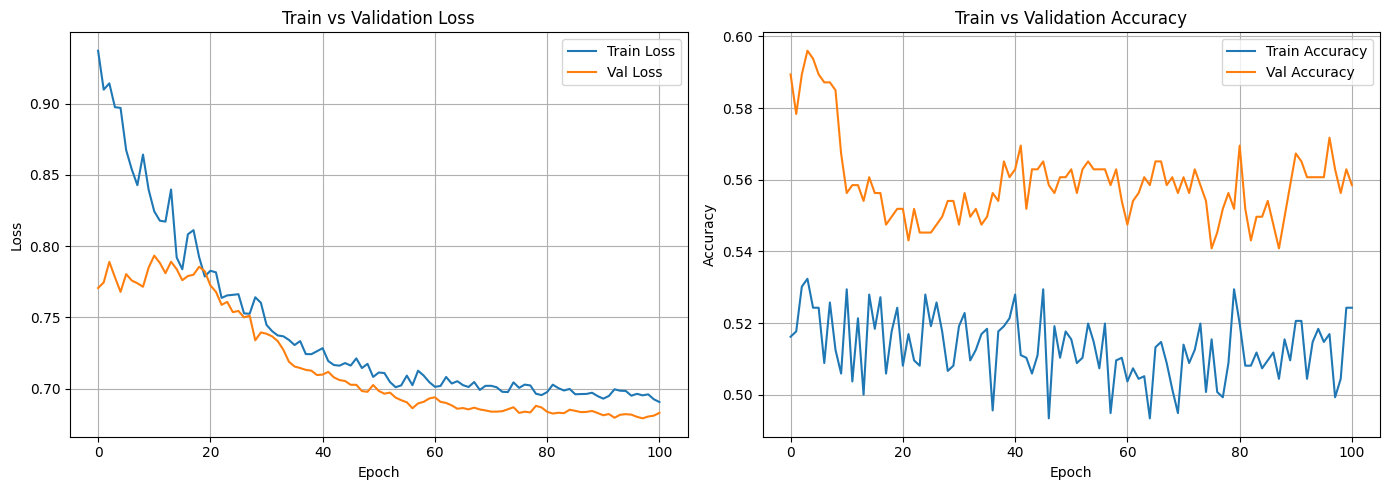

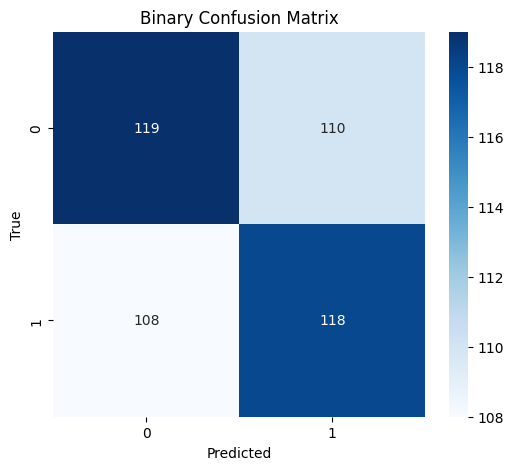

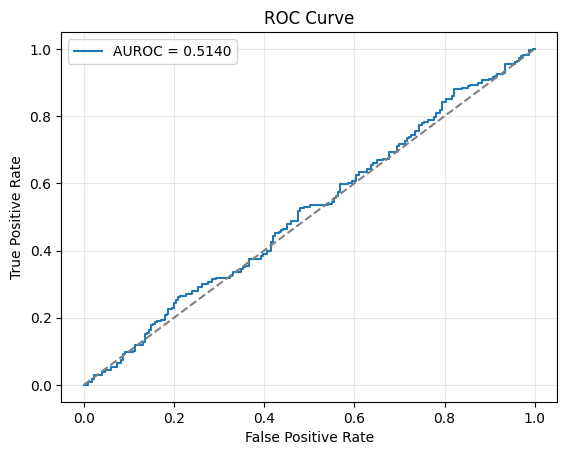

Accuracy : 52.09%
Precision: 0.5175
Recall   : 0.5221
F1 Score : 0.5198
AUROC    : 0.5140


In [ ]:
# Training 
%run -m train --mode Binary --model resnet101 --epochs 100 --batch-size 32 --seed 777 --save-dir results/finetune_last_layer

# Evaluation
%run -m evaluate --mode Binary --model resnet50 --batch-size 32 --weights results/finetune_last_layer/best_model_v1.pt